# Anomaly Detection using Unsupervised KNN

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Read Data

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/archive/netflix.csv")
df = df.iloc[4000:,:]
df['Date']=pd.to_datetime(df['Date'])
df

,Date,High,Low,Open,Close,Volume,Adj Close
4000,2018-04-13,317.489990,308.230011,317.290009,311.649994,12046600.0,311.649994
4001,2018-04-16,316.100006,304.000000,315.989990,307.779999,20307900.0,307.779999
4002,2018-04-17,338.619995,323.769989,329.660004,336.059998,33866500.0,336.059998
4003,2018-04-18,338.820007,331.100006,336.299988,334.519989,11221100.0,334.519989
4004,2018-04-19,335.309998,326.769989,332.880005,332.700012,8438800.0,332.700012
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


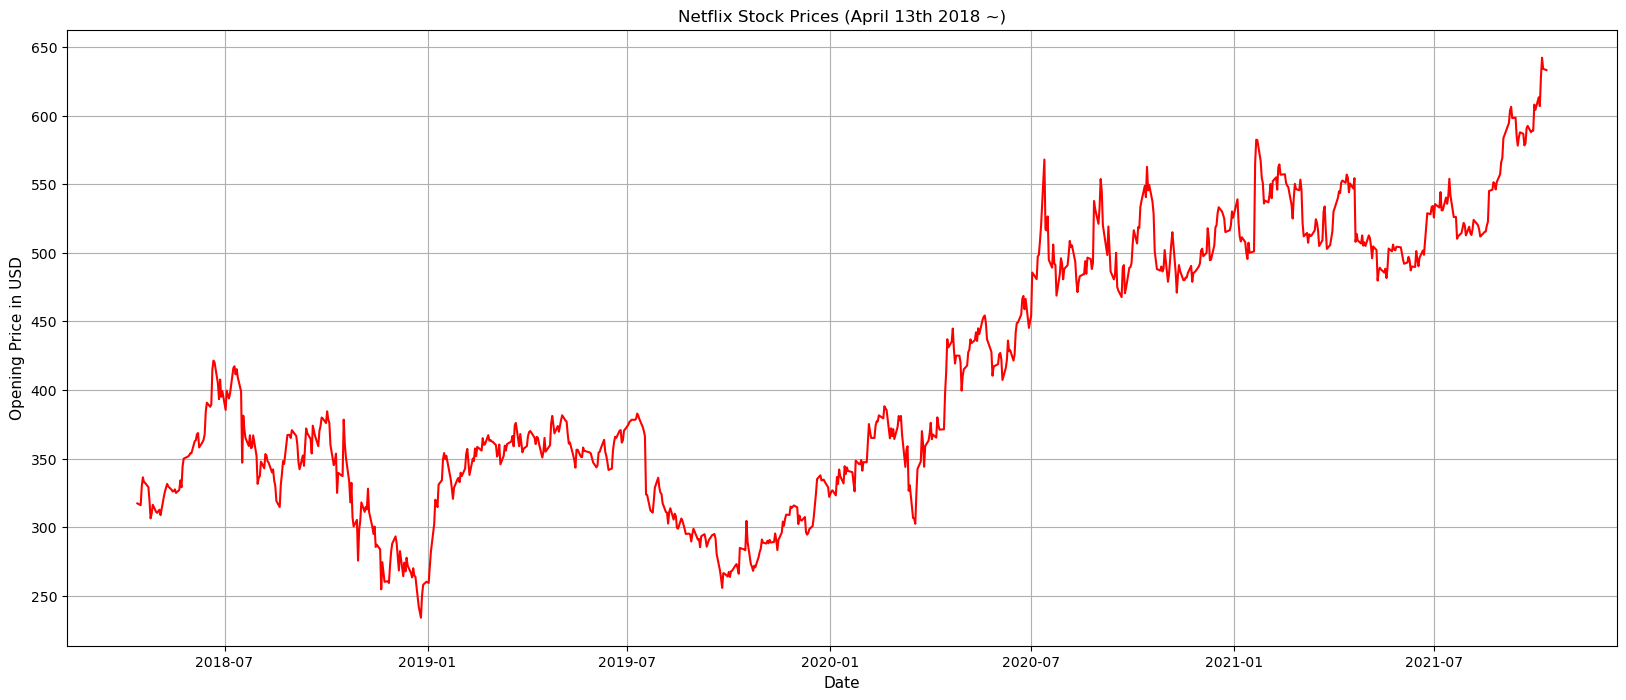

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
plt.plot(df["Date"], df["Open"], color='Red')
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Opening Price in USD', fontsize='11')
plt.title('Netflix Stock Prices (April 13th 2018 ~)')
plt.grid()
plt.show()

# Data Preprocessing

In [7]:
df = df.drop(columns=['High','Low','Close','Volume','Adj Close'])

In [8]:
for i in range(len(df)):
    df['Date'][i+4000] = i
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4992\3876674765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i+4000] = i


,Date,Open
4000,0,317.290009
4001,1,315.989990
4002,2,329.660004
4003,3,336.299988
4004,4,332.880005
...,...,...
4876,876,606.940002
4877,877,628.179993
4878,878,642.229980
4879,879,634.169983


## Unsupervised Learning : KNN

**KNN is a supervised learning-based algorithm.However, using KNN's distance calculation method can also be used as an unsupervised learning method.**  
**In this work, we will use Scikit-Learn's NearestNeighbors, which we can use it for unsupervised learning**

### sklearn.neighbors.NearestNeighbors
```
class sklearn.neighbors.NearestNeighbors(*, n_neighbors=5, radius=1.0, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, n_jobs=None)
```
- n_neighbors : int, default=5 (Number of neighbors to use by default for kneighbors queries.)
- radius : float, default=1.0 (Range of parameter space to use by default for radius_neighbors queries.)
- algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ (Algorithm used to compute the nearest neighbors)
- metric : str or callable, default=’minkowski’ (the distance metric to use for the tree.)
- p : int, default=2 (Parameter for the Minkowski metric from sklearn.metrics.pairwise.pairwise_distances. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.)

In [9]:
# create model
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(df)

NearestNeighbors(n_neighbors=10)

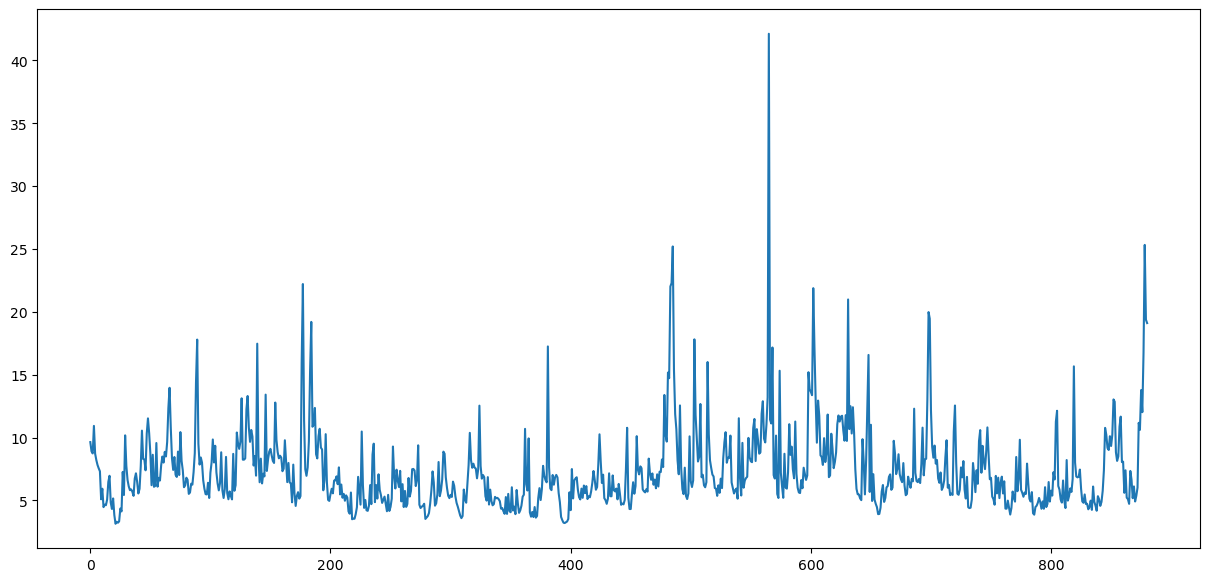

In [10]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df)
# plot
plt.figure(figsize=(15, 7))
plt.plot(distances.mean(axis =1))

In [11]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0       9.639025
1       8.904911
2       8.737343
3      10.929187
4       8.726872
         ...    
876    12.021366
877    16.744061
878    25.327327
879    19.376043
880    19.108079
Length: 881, dtype: float64

# Get Abnormal Points

**Set thresholds with reference to statistics.**

In [12]:
distances_mean.describe()

count    881.000000
mean       7.380966
std        3.273057
min        3.141603
25%        5.352988
50%        6.589125
75%        8.408707
max       42.124777
dtype: float64

**Since 75th percentile is 8.35, we will set threshold into 9.0**

In [15]:
th = 9.0
outlier_index = np.where(distances_mean > th)
outlier_index
outlier_values = df.iloc[outlier_index]

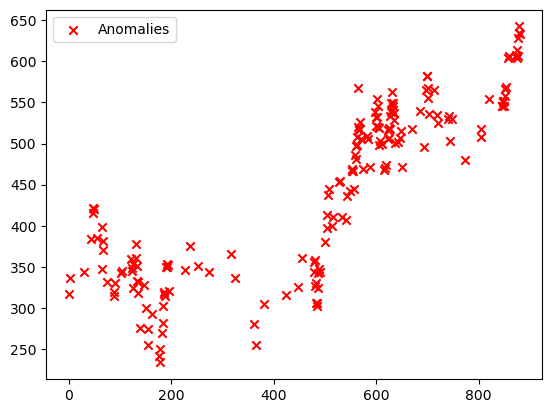

In [16]:
plt.scatter(outlier_values["Date"], outlier_values["Open"], color="r", marker="x", label="Anomalies")
plt.legend()


In [14]:
outlier_values = df.iloc[outlier_index]
outlier_values

,Date,Open
4000,0,317.290009
4003,3,336.299988
4029,29,344.339996
4043,43,384.269989
4047,47,415.149994
...,...,...
4876,876,606.940002
4877,877,628.179993
4878,878,642.229980
4879,879,634.169983


## Visualize Abnormal Points

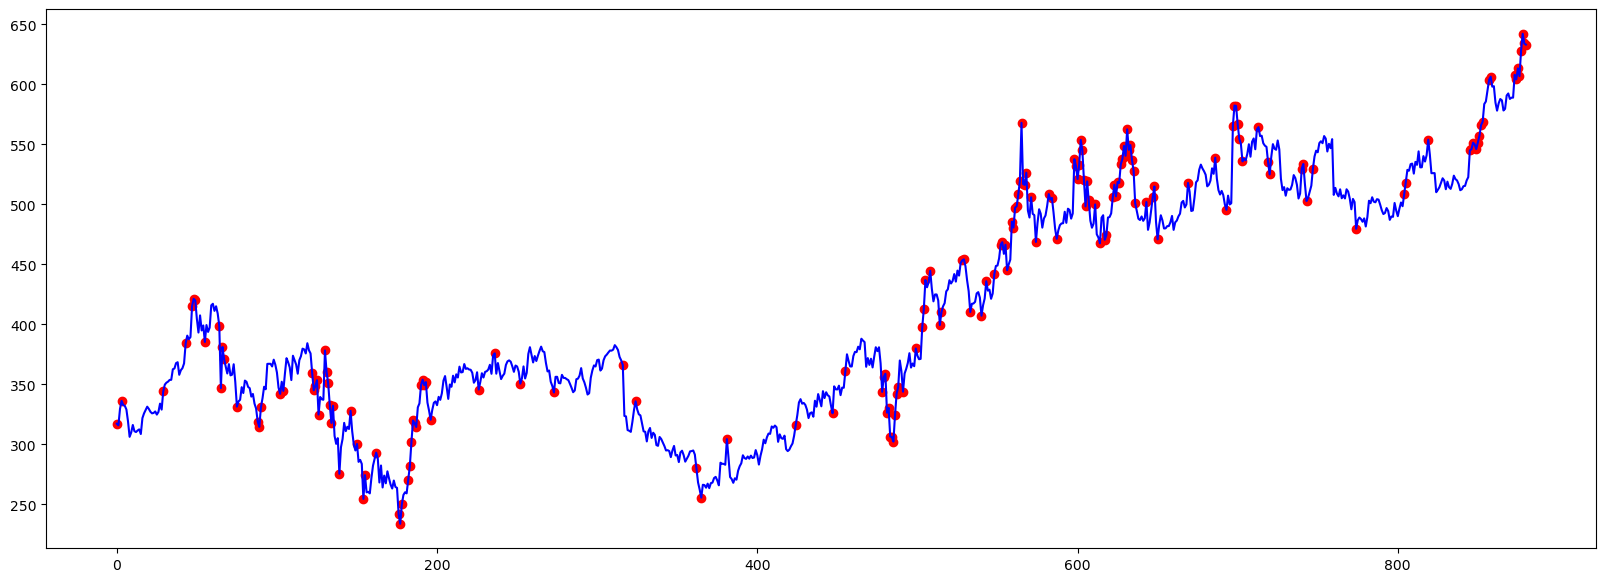

In [15]:
# plot data
plt.figure(figsize=(20, 7))
plt.plot(df["Date"], df["Open"], color = "b")
# plot outlier values
plt.scatter(outlier_values["Date"], outlier_values["Open"], color = "r")

**It can be seen that our KNN algorithm captures the soaring and plunging points of the stock graph quite well!**

# Visualizing Anomalies over time

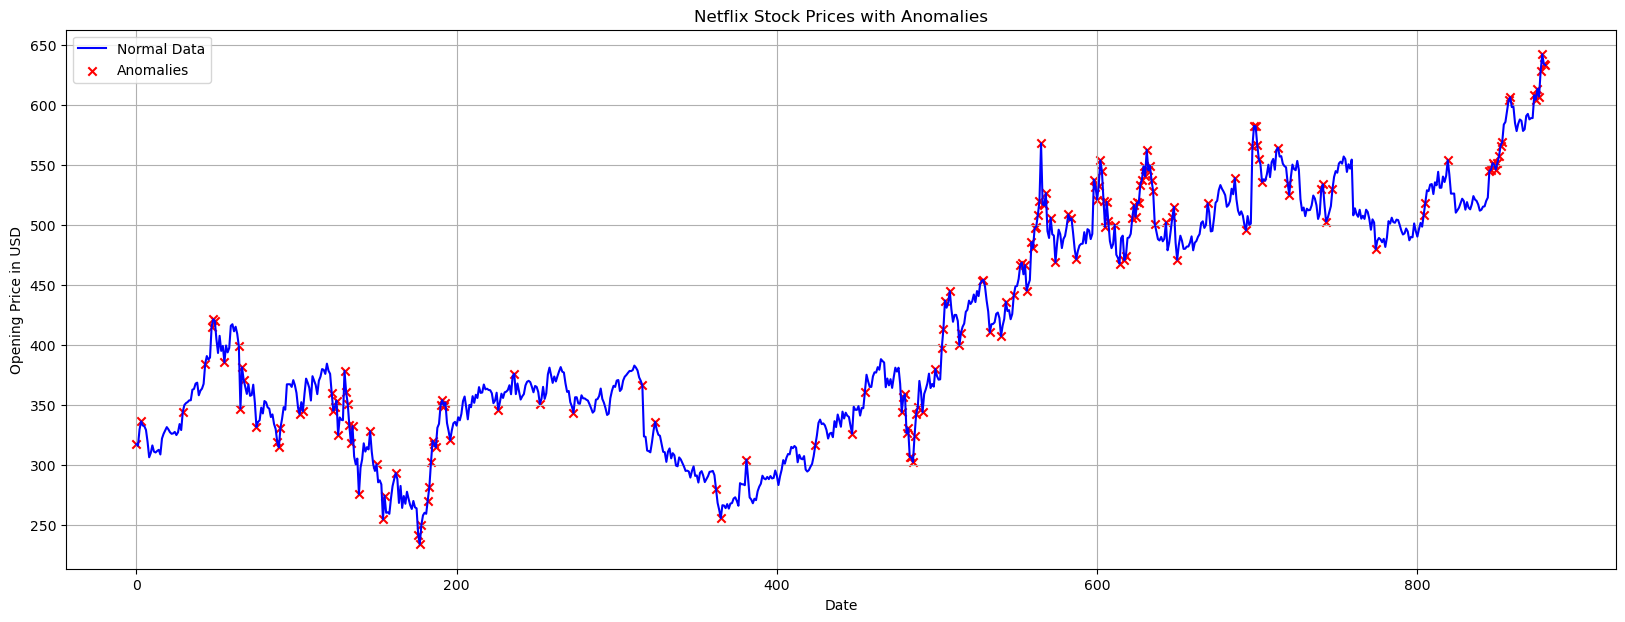

In [17]:
plt.figure(figsize=(20, 7))
plt.plot(df["Date"], df["Open"], color="b", label="Normal Data")
plt.scatter(outlier_values["Date"], outlier_values["Open"], color="r", marker="x", label="Anomalies")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Opening Price in USD")
plt.title("Netflix Stock Prices with Anomalies")
plt.grid()
plt.show()


# Density Plot

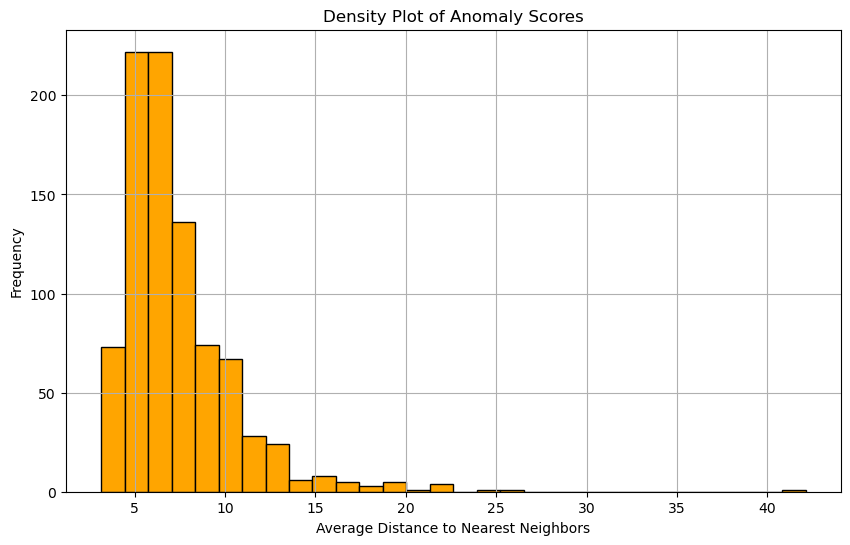

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(distances_mean, bins=30, color="orange", edgecolor="black")
plt.xlabel("Average Distance to Nearest Neighbors")
plt.ylabel("Frequency")
plt.title("Density Plot of Anomaly Scores")
plt.grid()
plt.show()


# Cluster Visualization

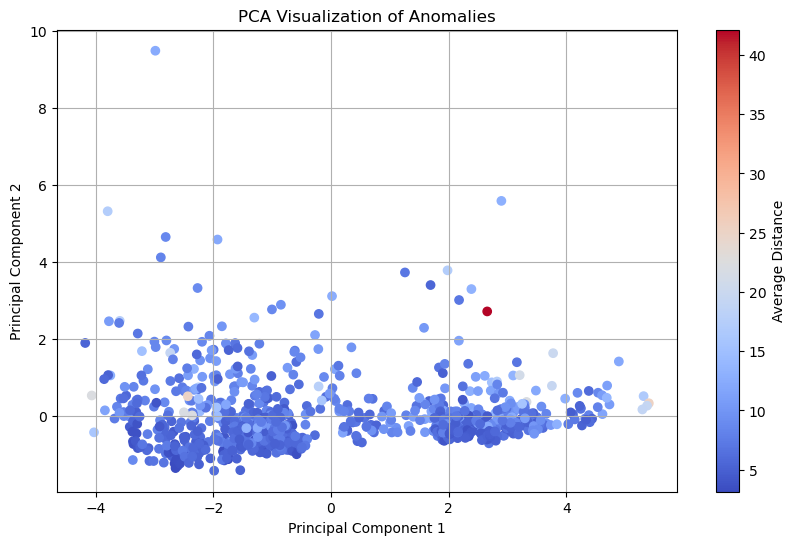

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=["Date"]))
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=distances_mean, cmap="coolwarm")
plt.colorbar(label="Average Distance")
plt.title("PCA Visualization of Anomalies")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()


# Time Window Analysis

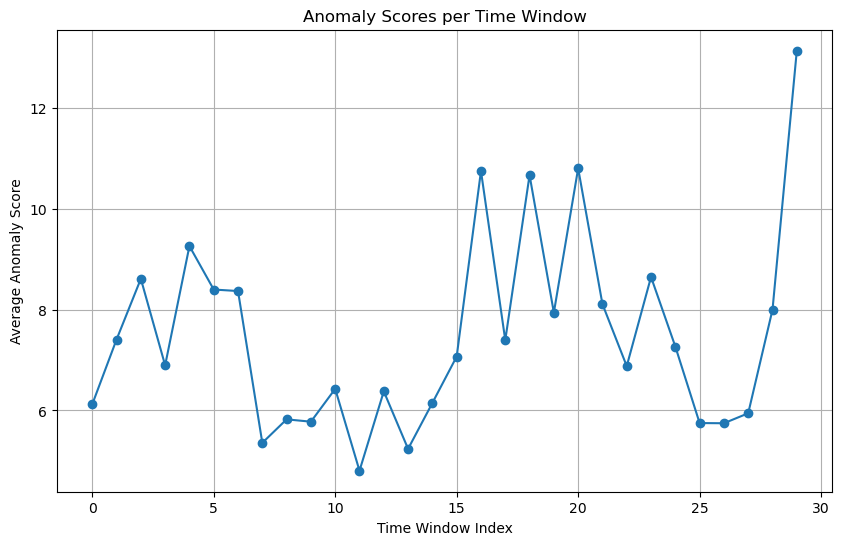

In [20]:
window_size = 30  # Adjust as needed
anomaly_scores_per_window = [distances_mean[i:i + window_size].mean() for i in range(0, len(distances_mean), window_size)]
plt.figure(figsize=(10, 6))
plt.plot(anomaly_scores_per_window, marker="o")
plt.title("Anomaly Scores per Time Window")
plt.xlabel("Time Window Index")
plt.ylabel("Average Anomaly Score")
plt.grid()
plt.show()
